In [1]:
! pip install -q kaggle

In [59]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import *

--2023-04-23 12:34:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-23 12:34:25 (82.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from PIL import Image
sns.set()
from tqdm import tqdm
%matplotlib inline

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [3]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bijinsanny","key":"1e955b9039e97f34fda032acc8021d3d"}'}

In [4]:

!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9085        330  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           2429         67  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           4209         97  1.0              
evangower/premier-league-2022-2023                             Pr

In [5]:
!kaggle datasets download -d nih-chest-xrays/sample -p /content/sample_data/ 

100% 4.19G/4.20G [02:10<00:00, 33.0MB/s]
100% 4.20G/4.20G [02:10<00:00, 34.4MB/s]


In [6]:
!unzip /content/sample_data/sample.zip

Streaming output truncated to the last 5000 lines.
  inflating: sample/sample/images/00003124_000.png  
  inflating: sample/sample/images/00003129_000.png  
  inflating: sample/sample/images/00003129_001.png  
  inflating: sample/sample/images/00003129_004.png  
  inflating: sample/sample/images/00003129_009.png  
  inflating: sample/sample/images/00003129_011.png  
  inflating: sample/sample/images/00003135_000.png  
  inflating: sample/sample/images/00003140_007.png  
  inflating: sample/sample/images/00003159_001.png  
  inflating: sample/sample/images/00003169_001.png  
  inflating: sample/sample/images/00003177_002.png  
  inflating: sample/sample/images/00003186_004.png  
  inflating: sample/sample/images/00003186_005.png  
  inflating: sample/sample/images/00003190_018.png  
  inflating: sample/sample/images/00003191_001.png  
  inflating: sample/sample/images/00003198_002.png  
  inflating: sample/sample/images/00003198_005.png  
  inflating: sample/sample/images/00003198_009.p

In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-04-23 11:32:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-23 11:32:50 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [8]:
data = pd.read_csv('/content/sample/sample_labels.csv')
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [9]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    data[pathology] = data['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
    
data['No Findings'] = data['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

In [10]:
def compute_class_freqs(labels):

    labels = np.array(labels)
    N = labels.shape[0]
    print(labels)
    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [11]:
data.iloc[:,1:]

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,...,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No Findings
0,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000,...,1,0,1,0,0,0,1,0,0,0
1,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000,...,0,0,0,0,0,0,0,0,0,0
2,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000,...,0,0,0,0,0,0,0,0,0,1
3,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000,...,0,1,0,0,0,0,0,0,0,0
4,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311,...,0,0,0,0,0,0,0,0,0,1
5602,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000,...,0,0,0,0,0,0,0,0,0,0
5603,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311,...,0,0,0,0,0,0,1,0,0,0
5604,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311,...,0,0,0,0,0,0,0,0,0,1


Data Augmentation to make use of less number of data

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
   preprocessing.RandomZoom(0.2)
], name="data_augmentation")

In [13]:
df = pd.read_csv('/content/sample/sample_labels.csv')

In [14]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [15]:
merge_df=df

In [16]:
merge_df['fl'] = merge_df['Finding Labels'].str.split("|")
merge_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,fl
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,"[Emphysema, Infiltration, Pleural_Thickening, ..."
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,"[Cardiomegaly, Emphysema]"
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,[No Finding]
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143,[Atelectasis]
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,"[Cardiomegaly, Edema, Effusion]"


In [18]:
df1 = pd.DataFrame()
df1['Id'] = df['Image Index'].copy()
df1["Label"]=df["Finding Labels"].copy()

to make datasets

In [19]:
df1.head()

,Id,Label
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...
1,00000013_026.png,Cardiomegaly|Emphysema
2,00000017_001.png,No Finding
3,00000030_001.png,Atelectasis
4,00000032_001.png,Cardiomegaly|Edema|Effusion


In [20]:

df1.loc[df['Finding Labels'] == "No Finding",'Label'] = "Normal"


In [21]:

df1.loc[df['Finding Labels'] != "No Finding", 'Label'] = "Abnormal"

In [22]:
df1.head()

,Id,Label
0,00000013_005.png,Abnormal
1,00000013_026.png,Abnormal
2,00000017_001.png,Normal
3,00000030_001.png,Abnormal
4,00000032_001.png,Abnormal


In [23]:
"""for i in df1.index:
        if(df1.loc(axis=0)[i,]!= "Normal"):
         df1.loc(axis=0)[i,]= "Abnormal"
df1.head()"""

'for i in df1.index:\n        if(df1.loc(axis=0)[i,]!= "Normal"):\n         df1.loc(axis=0)[i,]= "Abnormal"\ndf1.head()'

In [24]:
import math,random
import glob,os
img_directory = sorted(glob.glob(os.path.join("/content/sample/sample", "sample/images","*.png")))

In [26]:
rows = math.ceil(np.sqrt(25))
cols = math.ceil(25/rows)

In [27]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, test_size=0.3, random_state=42, shuffle = True, stratify=df1['Label'])

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)

print("Found {} samples for training".format(len(train)))
print("Found {} samples for validation".format(len(val)))

Found 3924 samples for training
Found 1682 samples for validation


In [30]:
from keras.preprocessing.image import ImageDataGenerator
traindata = ImageDataGenerator(rescale=1./255, horizontal_flip = True, vertical_flip = False, height_shift_range= 0.05, width_shift_range=0.1,rotation_range=5, 
                                   shear_range = 0.1, fill_mode = 'reflect',zoom_range=0.15)

validateData = ImageDataGenerator(rescale=1./255)

trainGen = traindata.flow_from_dataframe(dataframe=df1, directory='/content/sample/sample/images', x_col="Id",y_col="Label", batch_size=64,
        target_size=(128,128),class_mode='binary')
import glob
img_directory = sorted(glob.glob(os.path.join("/content/sample/images","*.png")))
df = pd.read_csv("/content/sample/sample_labels.csv")
df1 = pd.DataFrame()
df1['Id'] = df['Image Index'].copy()
df1['Label'] = df['Finding Labels'].apply(lambda val: val.split('|'))
Labels = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia', 'No Finding']
validateGenr = validateData.flow_from_dataframe(dataframe=val,directory='/content/sample/sample/images', x_col="Id",y_col="Label", batch_size=64,
        target_size=(128,128),class_mode='binary')

Found 5606 validated image filenames belonging to 2 classes.
Found 1682 validated image filenames belonging to 2 classes.


In [37]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

base_mobilenet_model = MobileNet(input_shape = trainGen[0][0].shape[1:], 
                                 include_top = False, weights = None)
binary_disease_model = Sequential()
binary_disease_model.add(base_mobilenet_model)
binary_disease_model.add(GlobalAveragePooling2D())
binary_disease_model.add(Dropout(0.5))
binary_disease_model.add(Dense(512))
binary_disease_model.add(Dropout(0.5))
binary_disease_model.add(Dense(1, activation = 'sigmoid'))
binary_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['accuracy', 'mae'])
binary_disease_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [38]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.0001, verbose=1),]

binary_disease_model.fit(trainGen, steps_per_epoch=int(len(train)/64),epochs=10,callbacks=callbacks, validation_data=validateGenr,validation_steps=int(len(val)/64),verbose=1)

<ipython-input-38-157083db3fc4>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  binary_disease_model.fit_generator(trainGen, steps_per_epoch=train_steps,epochs=10,callbacks=callbacks, validation_data=validateGenr,validation_steps=val_steps,verbose=1)


Epoch 1/10
61/61 [==============================] - 135s 2s/step - loss: 1.0366 - accuracy: 0.5204 - mae: 0.4921 - val_loss: 0.6937 - val_accuracy: 0.4591 - val_mae: 0.5003 - lr: 0.0010
Epoch 2/10
61/61 [==============================] - 94s 2s/step - loss: 0.8724 - accuracy: 0.5379 - mae: 0.4828 - val_loss: 0.6946 - val_accuracy: 0.4585 - val_mae: 0.5006 - lr: 0.0010
Epoch 3/10
61/61 [==============================] - ETA: 0s - loss: 0.8157 - accuracy: 0.5517 - mae: 0.4764
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
61/61 [==============================] - 108s 2s/step - loss: 0.8157 - accuracy: 0.5517 - mae: 0.4764 - val_loss: 0.7110 - val_accuracy: 0.5421 - val_mae: 0.4880 - lr: 0.0010
Epoch 4/10
61/61 [==============================] - 89s 1s/step - loss: 0.7765 - accuracy: 0.5658 - mae: 0.4733 - val_loss: 0.6897 - val_accuracy: 0.5421 - val_mae: 0.4958 - lr: 1.0000e-04
Epoch 5/10
61/61 [==============================] - 108s 2s/step - loss: 0.7355 

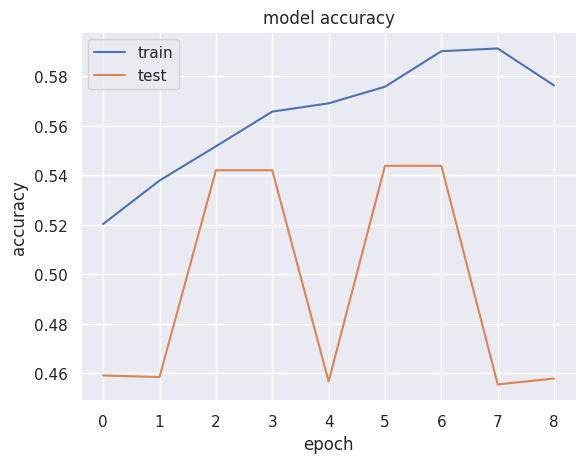

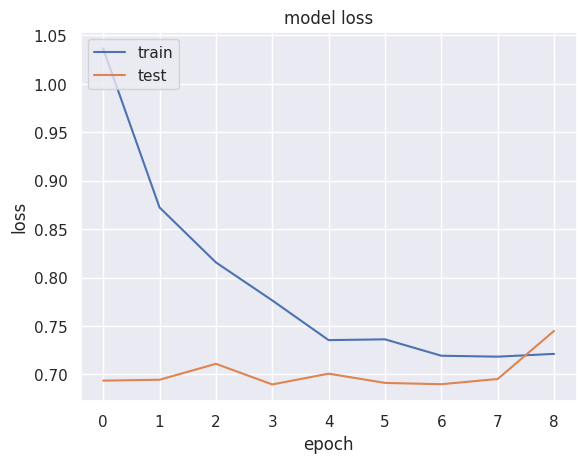

In [39]:
history = binary_disease_model.history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

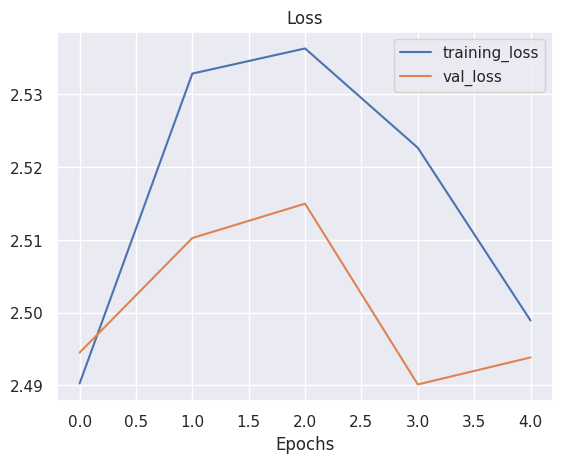

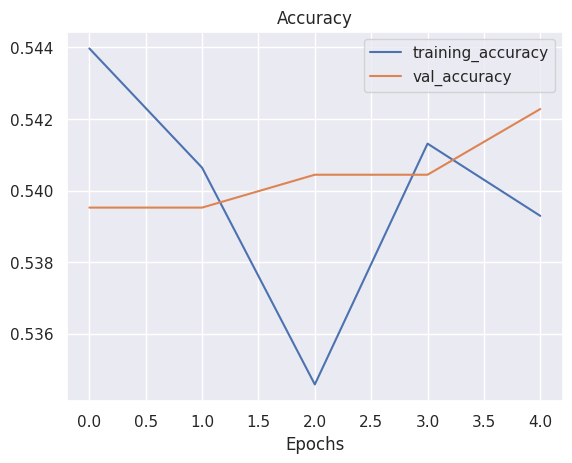

In [61]:
plot_loss_curves(history)

In [40]:
import glob
img_directory = sorted(glob.glob(os.path.join("/content/sample/sample", "sample/images","*.png")))
df = pd.read_csv(os.path.join("/content/sample/sample_labels.csv"))
df1 = pd.DataFrame()
df1['Id'] = df['Image Index'].copy()
df1['Label'] = df['Finding Labels'].apply(lambda val: val.split('|'))
Labels = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia', 'No Finding']

In [41]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, test_size=0.2, random_state=42, shuffle = True)

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)

print("Found {} samples for training".format(len(train)))
print("Found {} samples for validation".format(len(val)))

Found 4484 samples for training
Found 1122 samples for validation


In [42]:
from keras.preprocessing.image import ImageDataGenerator
trainDataGen = ImageDataGenerator(rescale=1./255,horizontal_flip = True,vertical_flip = False,height_shift_range= 0.05, 
                                   width_shift_range=0.1,rotation_range=5, shear_range = 0.1,fill_mode = 'reflect',zoom_range=0.15)

valDataGen = ImageDataGenerator(rescale=1./255)

trainGen = trainDataGen.flow_from_dataframe(
        dataframe=df1,
        directory='/content/sample/sample/images',
        x_col="Id",y_col="Label",batch_size=64,target_size=(128,128),classes = Labels,class_mode='categorical')

valGen = valDataGen.flow_from_dataframe(dataframe=val,
        directory='/content/sample/sample/images',x_col="Id",y_col="Label",batch_size=64,target_size=(128,128),classes = Labels,class_mode='categorical')

Found 5606 validated image filenames belonging to 15 classes.
Found 1122 validated image filenames belonging to 15 classes.


In [52]:
import tensorflow as tf

from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
outputs=layers.Dense(len(Labels),activation="softmax",name="output_layer")(x)

model_2=tf.keras.Model(inputs,outputs)

In [53]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

In [55]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.0001, verbose=1),
]

train_steps = int(len(train)/64)
val_steps = int(len(val)/64)
history_2=model_2.fit(trainGen,
        steps_per_epoch=train_steps,
        epochs=5,
        callbacks=callbacks,
        validation_data=valGen,
        validation_steps=val_steps,
        verbose=1)

Epoch 1/5
70/70 [==============================] - 99s 1s/step - loss: 2.4903 - accuracy: 0.5440 - val_loss: 2.4945 - val_accuracy: 0.5395 - lr: 0.0010
Epoch 2/5
70/70 [==============================] - 99s 1s/step - loss: 2.5328 - accuracy: 0.5406 - val_loss: 2.5102 - val_accuracy: 0.5395 - lr: 0.0010
Epoch 3/5
70/70 [==============================] - ETA: 0s - loss: 2.5363 - accuracy: 0.5346
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
70/70 [==============================] - 94s 1s/step - loss: 2.5363 - accuracy: 0.5346 - val_loss: 2.5150 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 4/5
70/70 [==============================] - 99s 1s/step - loss: 2.5226 - accuracy: 0.5413 - val_loss: 2.4901 - val_accuracy: 0.5404 - lr: 1.0000e-04
Epoch 5/5
70/70 [==============================] - 98s 1s/step - loss: 2.4989 - accuracy: 0.5393 - val_loss: 2.4938 - val_accuracy: 0.5423 - lr: 1.0000e-04


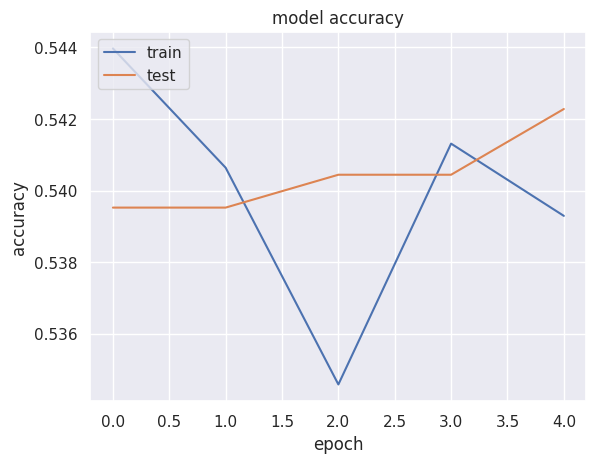

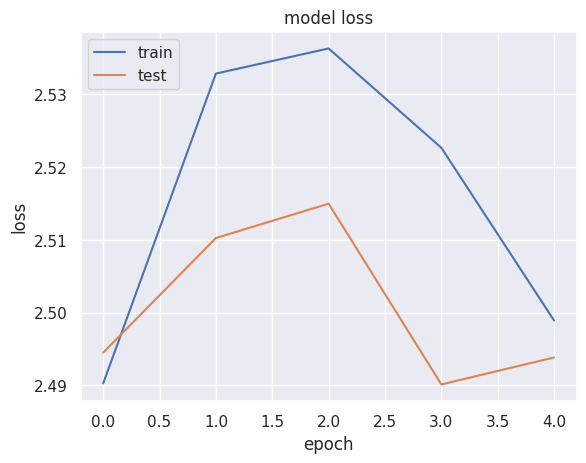

In [62]:
history2=model_2.history


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

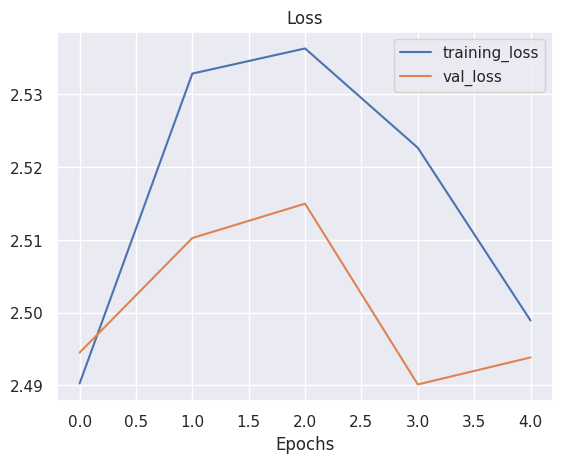

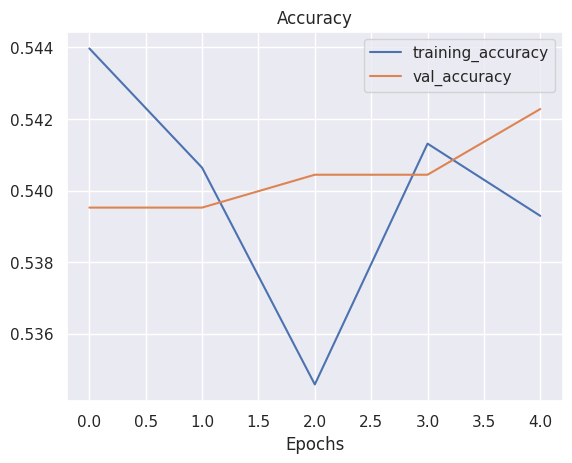

In [60]:
plot_loss_curves(history_2)

In [ ]:
merge_df['f2'] = merge_df['fl'].apply(make)

In [ ]:
new_df = merge_df[['f2','Image Index']]
new_df.head()

In [ ]:
new_df.shape

In [ ]:
new_df['f2'].value_counts()

In [ ]:
new_df

In [ ]:
"""for i in new_df.index:
   
        new_df.at[i, 'Image Index'] ="/content/sample/sample/images/"+ new_df.at[i, 'Image Index']
new_df.head()"""

In [ ]:
new_df.rename(columns={"Image Index": "FilePath"}, inplace = True)

In [ ]:
new_df

In [ ]:
X_train